# A) Implementación de algoritmo Merge Sort en Python

In [6]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time 
import datetime

# Implementación codigo Counting Sort

In [ ]:
def counting_sort(arr):
    # Encuentra el valor máximo en el arreglo
    max_value = max(arr)
    
    # Crear un arreglo de conteo con el tamaño adecuado
    count = [0] * (max_value + 1)
    
    # Contar la frecuencia de cada elemento
    for num in arr:
        count[num] += 1
    
    # Reconstruir el arreglo ordenado
    sorted_arr = []
    for i in range(len(count)):
        while count[i] > 0:
            sorted_arr.append(i)
            count[i] -= 1
    
    return sorted_arr

## Test de algoritmo counting sort

In [8]:
# Generate a random array with 10 items
unsorted_array = list(np.random.randint(0,100,10))


print(f"Unsorted Array : {unsorted_array}")
sorted_array = counting_sort(unsorted_array)


print(f"Sorted Array {sorted_array}")

Unsorted Array : [4, 81, 74, 39, 37, 58, 94, 1, 58, 56]
Sorted Array [1, 4, 37, 39, 56, 58, 58, 74, 81, 94]


In [149]:
time_inicial = time.time()  # Tiempo inicio

time_final = time.time() - time_inicial
n = 5000

# DataFrame para guardar la media de tiempo de ejecucion para cada n experimento
times_sort = []
while time_final < 300:#300
    
    # 100 experimentos para cada valor de n 

    temp_time = []
    
    
    for i in range(100):
        
        tiempo_experimentol_inicial = time.time()

        unsorted_array = np.random.randint(1,5000,n)
        sorted_array = counting_sort(unsorted_array)
        
        # Agregar tiempo de ejecucion para cada subexperimento de n
        temp_time.append(time.time() - tiempo_experimentol_inicial)

    # calcular promedio de cada subexperimento
    promedio = sum(temp_time)/len(temp_time)
    times_sort.append(promedio)
    
    time_final = time.time() - time_inicial
    n += 1

# Creacion dataframe

 

In [168]:
df_counting_sort = pd.DataFrame({"Size":list(range(5000,n)) ,"Time Execution":times_sort})

for i in range(50):

    # Encuentra el índice del elemento mayor
    indice_mayor = df_counting_sort["Time Execution"].idxmax()

    # Calcula la media entre el elemento anterior y posterior
    media = (df_counting_sort.at[indice_mayor-1, "Time Execution"] + df_counting_sort.at[indice_mayor+1,"Time Execution"]) / 2

    # Reemplaza el elemento mayor por el valor de la media
    df_counting_sort.at[indice_mayor, "Time Execution"] = media


0.001627206802368164


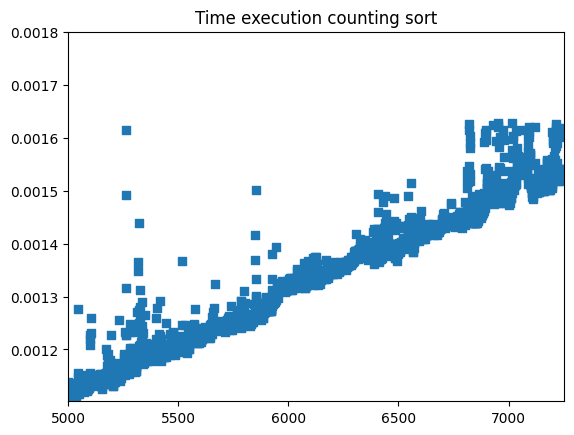

In [234]:
print(df_counting_sort['Time Execution'].max())
plt.scatter(df_counting_sort['Size'],df_counting_sort['Time Execution'],marker = "s",label = "first")
plt.title("Time execution counting sort")
plt.ylim(df_counting_sort['Time Execution'].min(),0.0018)
plt.xlim(5000, n + 10)

plt.show()

Encuentre las constantes c3 y n0 que demuestren que el tiempo de
ejecuci ́on experimental de counting-sort es T (n) = O(n + k). So-
bre la gr ́afica de los resultados experimentales tambi ́en graficar la
funci ́on h(n) = c3(n + k). Debe especificar cu ́al es c3 y n0. Las gr ́afi-
cas deben ser claras. Se debe poder distinguir claramente las l ́ıneas
y se debe especificar cu ́al es cada una.

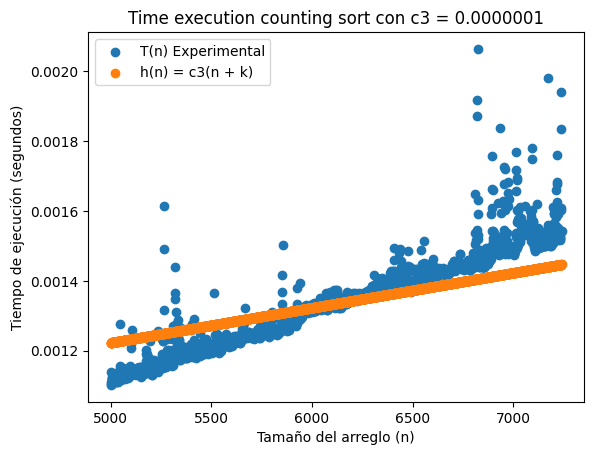

In [243]:
tamaños = np.array(list(range(5000,n)))

c3 = 0.0000001 # Valor arbitrario para c3
k = tamaños[-1] # Tomamos el máximo tamaño de arreglo como el rango 'k'
h_n = c3 * (tamaños + k)

plt.scatter(tamaños, times_sort, label='T(n) Experimental')
plt.scatter(tamaños, h_n, label='h(n) = c3(n + k)')
plt.xlabel('Tamaño del arreglo (n)')
plt.title("Time execution counting sort con c3 = 0.0000001")
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend()
plt.show()

In [254]:
 ## Codigo merge sort

def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)

    return merge(left_half, right_half)


def merge(left, right):
    merged = []
    left_index = 0
    right_index = 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            merged.append(left[left_index])
            left_index += 1
        else:
            merged.append(right[right_index])
            right_index += 1

    while left_index < len(left):
        merged.append(left[left_index])
        left_index += 1

    while right_index < len(right):
        merged.append(right[right_index])
        right_index += 1

    return merged

    

In [255]:
def cycle_sort(arr):
    n = len(arr)

    for cycle_start in range(n - 1):
        item = arr[cycle_start]

        # Encuentra la posición correcta para el elemento actual
        pos = cycle_start
        for i in range(cycle_start + 1, n):
            if arr[i] < item:
                pos += 1

        # Si el elemento actual ya está en la posición correcta, continúa al siguiente ciclo
        if pos == cycle_start:
            continue

        # Ignora los elementos duplicados
        while item == arr[pos]:
            pos += 1

        # Coloca el elemento en su posición correcta
        arr[pos], item = item, arr[pos]

        # Realiza ciclos adicionales para colocar todos los elementos en su posición correcta
        while pos != cycle_start:
            pos = cycle_start

            # Encuentra la posición correcta para el elemento actual
            for i in range(cycle_start + 1, n):
                if arr[i] < item:
                    pos += 1

            # Ignora los elementos duplicados
            while item == arr[pos]:
                pos += 1

            # Coloca el elemento en su posición correcta
            arr[pos], item = item, arr[pos]

    return arr


In [351]:
time_inicial = time.time()  # Tiempo inicio

time_final = time.time() - time_inicial
n_merge = 5000

# DataFrame para guardar la media de tiempo de ejecucion para cada n experimento
tine_sort_merge = []
while time_final < 300:#300

    tiempo_experimentol_inicial = time.time()

    unsorted_array = np.random.randint(1,5000,n_merge)
    sorted_array = merge_sort(unsorted_array)
        
    # Agregar tiempo de ejecucion para cada subexperimento de n
    # calcular promedio de cada subexperimento
    
    tine_sort_merge.append(time.time() - tiempo_experimentol_inicial)
    
    time_final = time.time() - time_inicial
    n_merge += 1


 

In [352]:
time_inicial = time.time()  # Tiempo inicio

time_final = time.time() - time_inicial
n_cycle = 5000

# DataFrame para guardar la media de tiempo de ejecucion para cada n experimento
time_sort_cycle = []
while time_final < 300:#300

    tiempo_experimentol_inicial = time.time()

    unsorted_array = np.random.randint(1,5000,n_cycle)
    sorted_array = cycle_sort(unsorted_array)
        
    # Agregar tiempo de ejecucion para cada subexperimento de n
    # calcular promedio de cada subexperimento
    
    time_sort_cycle.append(time.time() - tiempo_experimentol_inicial)
    
    time_final = time.time() - time_inicial
    n_cycle += 1



In [354]:
df_merge_sort = pd.DataFrame({"Size":list(range(5000,n_merge)) ,"Time Execution":tine_sort_merge})
df_cycle_sort = pd.DataFrame({"Size":list(range(5000,n_cycle)) ,"Time Execution":time_sort_cycle})


0.06222105026245117


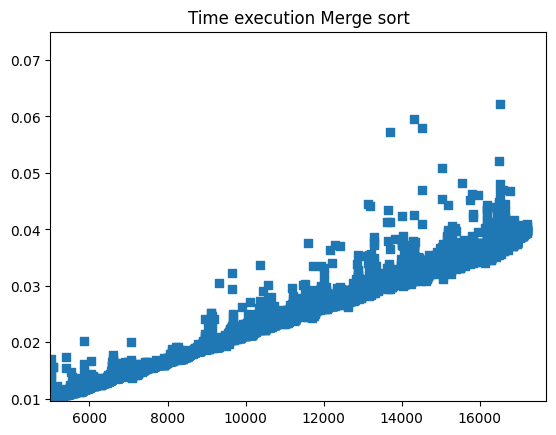

In [363]:
print(df_merge_sort['Time Execution'].max())
plt.scatter(df_merge_sort['Size'],df_merge_sort['Time Execution'],marker = "s",label = "first")
plt.title("Time execution Merge sort")
plt.ylim(df_merge_sort['Time Execution'].min(),0.075)
plt.xlim(5000, n_merge +500)

plt.show()

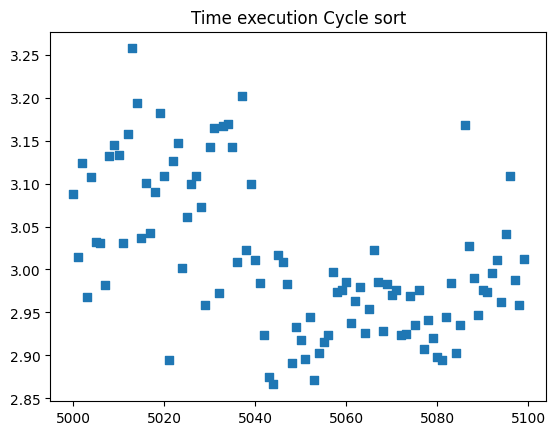

In [365]:

plt.scatter(df_cycle_sort['Size'],df_cycle_sort['Time Execution'],marker = "s",label = "first")
plt.title("Time execution Cycle sort")
#plt.ylim(df_cycle_sort['Time Execution'].min(),4)
#plt.xlim(5000, n_merge + 2)

plt.show()

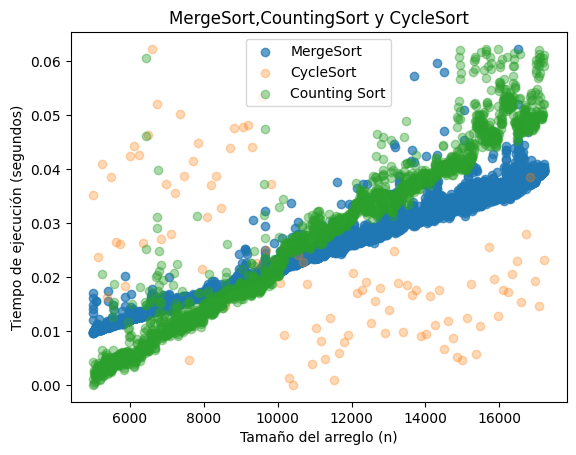

In [393]:
# Escalar datos
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,df_merge_sort['Time Execution'].max()))

scaler2 = MinMaxScaler(feature_range=(5000,n_merge))


scaled_column = pd.DataFrame(scaler.fit_transform(df_cycle_sort[['Time Execution']]), columns=['Time Execution'])
scaled_column_2 = pd.DataFrame(scaler2.fit_transform(df_cycle_sort[['Size']]), columns=['Size'])
scaled_column_3 = pd.DataFrame(scaler2.fit_transform(df_counting_sort[['Size']]), columns=['Size'])
scaled_column_4 = pd.DataFrame(scaler.fit_transform(df_counting_sort[['Time Execution']]), columns=['Time Execution'])

df_cycle_sort['Time Execution'] = scaled_column['Time Execution']
df_counting_sort['Time Execution'] = scaled_column_4['Time Execution']
df_cycle_sort['Size'] = scaled_column_2['Size']
df_counting_sort['Size'] = scaled_column_3['Size']

plt.scatter(df_merge_sort['Size'], df_merge_sort['Time Execution'], label='MergeSort',alpha = 0.7)
plt.scatter(df_cycle_sort['Size'], df_cycle_sort['Time Execution'], label='CycleSort',alpha = 0.3)
plt.scatter(df_counting_sort['Size'], df_counting_sort['Time Execution'], label='Counting Sort',alpha = 0.4)
plt.xlabel('Tamaño del arreglo (n)')
plt.title("MergeSort,CountingSort y CycleSort")
plt.ylabel('Tiempo de ejecución (segundos)')
plt.legend()
plt.show()

In [381]:
n_merge

17211